# The normal equation

### 1. Dataset

Let $\quad X \in \mathbb{R}^{m \times (n + 1)} \quad \text{and} \quad y \in  \mathbb{R}^{m}$
$$X = \left[\begin{array}{c}x^{1}\\ \vdots\\ x^{m} \end{array}\right] \quad \text{and} \quad y = \left[\begin{array}{c}y_1 \\ \vdots \\ y_m \end{array}\right]$$

### 2. Model

Let $\quad \theta \in \mathbb{R}^{n+1} \quad\text{and}\quad \forall i \in \{1, \cdots, m\},\ \ x^i \in \mathbb{R}^{n+1}$
$$ f\left(x^{i}\right) \ =\ x^{i} \cdot \theta\ ; \quad \theta =\left[\begin{array}{c}a_n \\ \vdots \\ a_0 \end{array}\right]\ ; \quad x^{i} = \left[\begin{array}{c}x_{1}^{i} \\ \vdots \\ x_{n}^{i} \\ 1 \end{array}\right]$$

**# The role of the machine is to find the parameters $\theta$**

- In the matrix form:
$$F = X \theta$$

### 3. Cost function

- Residual sum of squares : 
$$ J = \frac{1}{2m} \sum_{i = 1}^{m} \left(f(x^{i}) - y_i\right)^2 $$

**# The object of this program is to minimize this function.**

- In the matrix form: $$ J\ =\ \frac{1}{2m} \left(X \theta - y\right)^2 $$

### 4. Minimization algorithm

$$
\begin{split}
\textrm{min}\left\{J(\theta) \in \mathbb{R} \ |\ \theta \in \mathbb{R}^{n+1} \right\}
& \quad\Leftrightarrow\quad 
\frac{\partial J}{\partial\theta}\ =\ 0  \\
& \quad\Leftrightarrow\quad 
\theta\ =\ \left(X^T X\right)^{-1} X ^T y
\end{split}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

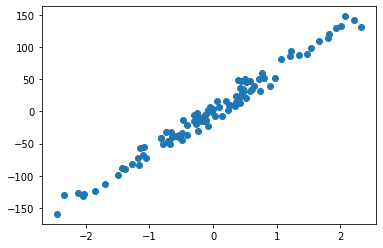

In [2]:
# Dataset

def linear(n_samples, n_features, noise=0.0, seed=None):
    """ Generate the datasets for linear regression.

    """
    if seed is not None:
        np.random.seed(seed)
    params = np.random.randint(20, 100, n_features)
    noise = np.random.randn(n_samples) * noise
    features = np.random.randn(n_samples, n_features)
    target = (features @ params) + noise
    return features, target


X, y = linear(n_samples=100, n_features=1, noise=10, seed=0)

# plot the dataset
_ = plt.scatter(X, y)

params = [63.50109798  1.01116374]


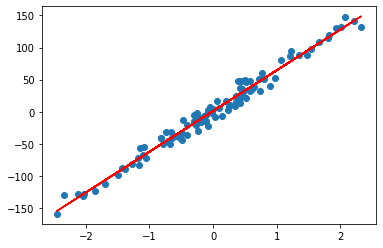

In [3]:
# Find the parameters

def normal_equation(X, y):
    X = np.concatenate((X, np.ones(X.shape)), axis=1)
    params = np.linalg.inv(X.T @ X) @ X.T @ y
    target = X @ params
    return params, target


params, target = normal_equation(X, y)
print("params =", params)

# plot result
plt.scatter(X, y)
_ = plt.plot(X, target, c='r')